In [8]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install kneed

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [92]:
raw_dataset = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
raw_dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


# Prečišćavanje dataseta

## brisanje nepotpunih vrsta

In [93]:
raw_dataset.shape

(16744, 17)

In [94]:
dataset = raw_dataset.dropna()

In [95]:
dataset.shape

(3301, 17)

## konverzija atributa Year u kategoričke vrednosti. 

In [96]:
dataset.to_csv('modified.csv')
#dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [86]:
dataset.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,1,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,1,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,0,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",0,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [99]:
dataset.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [20]:
def clean(column):
    name = set()
    for name_string in dataset[column]:
        print(name_string)
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in dataset[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index

def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    #print(column_name)
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in dataset[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))

In [28]:
num = cleaned_df['Directors'].isnull().sum()
print(num)

0


In [21]:
plot_column('Genres')

Action,Adventure,Sci-Fi,Thriller
Action,Sci-Fi
Action,Adventure,Sci-Fi
Adventure,Comedy,Sci-Fi
Western
Animation,Action,Adventure,Family,Sci-Fi
Biography,Drama,Music,War
Drama,Western
Action,Adventure
Adventure,Drama,War
Crime,Drama
Comedy,Drama
Drama,Fantasy,War
Drama,Thriller
Adventure,Comedy,Fantasy
Western
Action,Adventure
Comedy,Fantasy,Romance
Biography,Drama,History
Drama,Romance,Sci-Fi
Drama
Biography,Drama
Biography,Drama
Drama,Romance
Comedy
Drama,Mystery,Sci-Fi,Thriller
Comedy,Drama,Romance
Action,Sci-Fi,Thriller
Biography,Crime,Drama
Drama,Mystery,Sci-Fi
Comedy,Drama,Romance
Crime,Drama
Action,Horror,Thriller
Animation,Action,Adventure,Comedy,Family,Sci-Fi
Action,Biography,Drama,Sport
Animation,Adventure,Comedy,Family
Action,Crime,Mystery,Sci-Fi,Thriller
Crime,Drama,Mystery,Thriller
Drama,Family
Comedy
Animation,Comedy,Family,Fantasy
Action,Crime,Drama,Thriller,Western
Crime,Thriller
Action,Adventure,Biography,Drama,History
Action,Adventure
Biography,Drama,Romance
Biography

AttributeError: 'float' object has no attribute 'split'

In [3]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(dataset)

ValueError: could not convert string to float: 'Inception'

In [19]:
labels = kmeans.labels_
clusters = kmeans.cluster_centers_
# print("----Labels:----")
# print(labels)
# print("----Cluters:----")
# print(clusters)

In [36]:
#elbow algorithm
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)

2


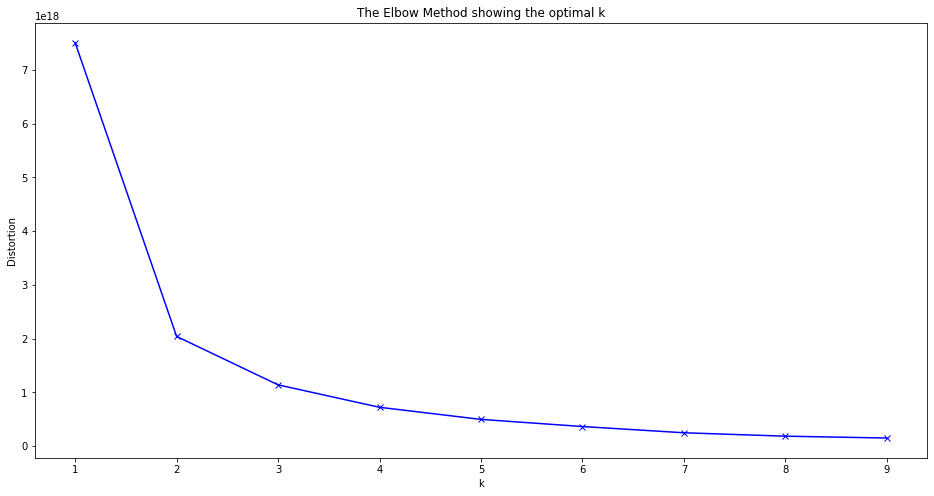

In [37]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [38]:
#silhouette algorithm
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
K = range(2,11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    silhouette_coefficients.append(score)

num_clusters = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(num_clusters)

2


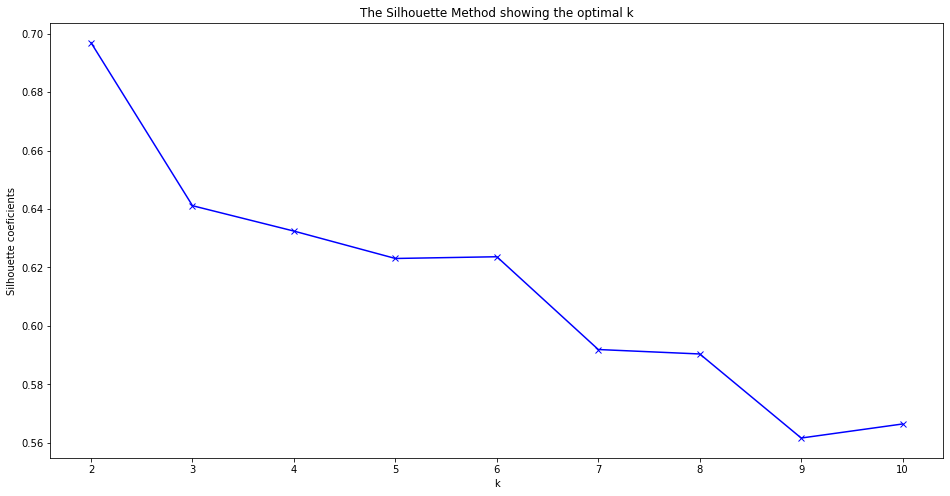

In [40]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette coeficients')
plt.title('The Silhouette Method showing the optimal k')
plt.show()